## Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats


## Loading the data

In [41]:
df= pd.read_csv('Wholesale Customer.csv')

In [42]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


## Summary and EDA

In [43]:
df.shape

(440, 9)

In [44]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [46]:
df_item=df

In [47]:
x= df_item.describe().round(1)
x

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.0,440.0,440.0,440.0,440.0,440.0,440.0
mean,220.5,12000.3,5796.3,7951.3,3071.9,2881.5,1524.9
std,127.2,12647.3,7380.4,9503.2,4854.7,4767.9,2820.1
min,1.0,3.0,55.0,3.0,25.0,3.0,3.0
25%,110.8,3127.8,1533.0,2153.0,742.2,256.8,408.2
50%,220.5,8504.0,3627.0,4755.5,1526.0,816.5,965.5
75%,330.2,16933.8,7190.2,10655.8,3554.2,3922.0,1820.2
max,440.0,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


In [48]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

<AxesSubplot:>

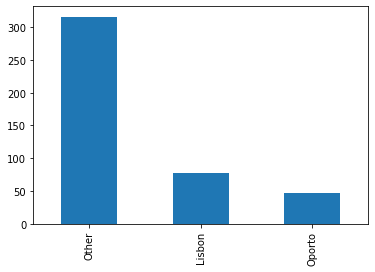

In [49]:
df['Region'].value_counts().plot(kind='bar')

In [50]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

<AxesSubplot:>

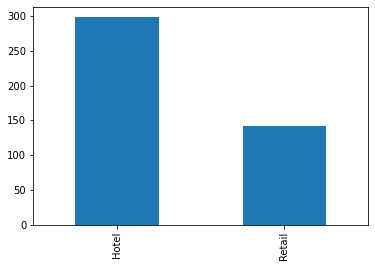

In [51]:
df['Channel'].value_counts().plot(kind='bar')

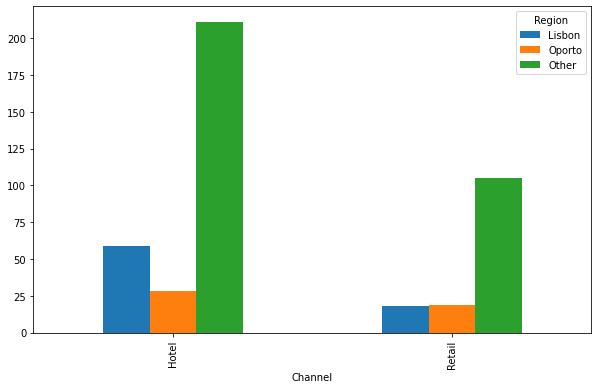

In [52]:
hist1= pd.crosstab(index=df['Channel'], columns=df['Region'])
hist1.plot.bar(figsize=(10,6))
plt.show()

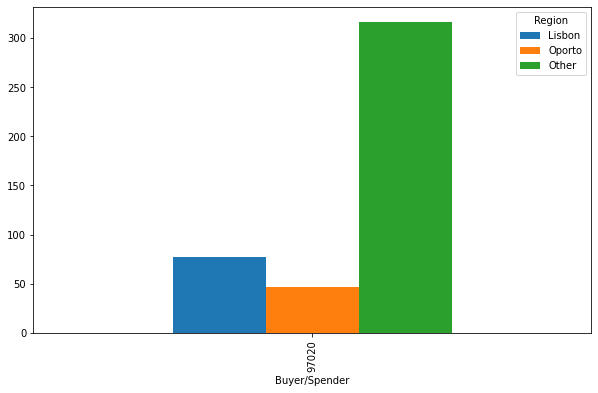

In [53]:
hist2= pd.crosstab(index=df['Buyer/Spender'].sum(), columns=df['Region'])
hist2.plot.bar(figsize=(10,6))
plt.xlabel('Buyer/Spender')
plt.show()

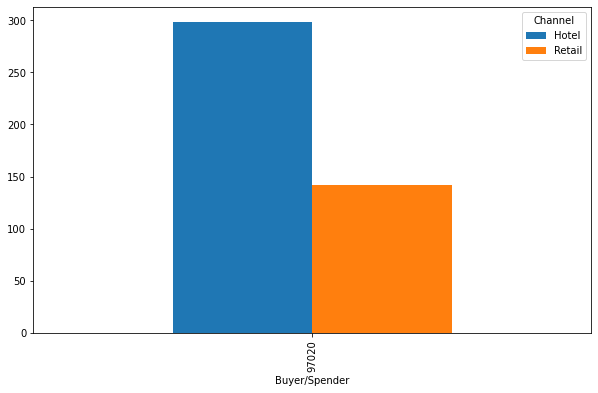

In [54]:
hist2= pd.crosstab(index=df['Buyer/Spender'].sum(), columns=df['Channel'])
hist2.plot.bar(figsize=(10,6))
plt.xlabel('Buyer/Spender')
plt.show()


## Outliers

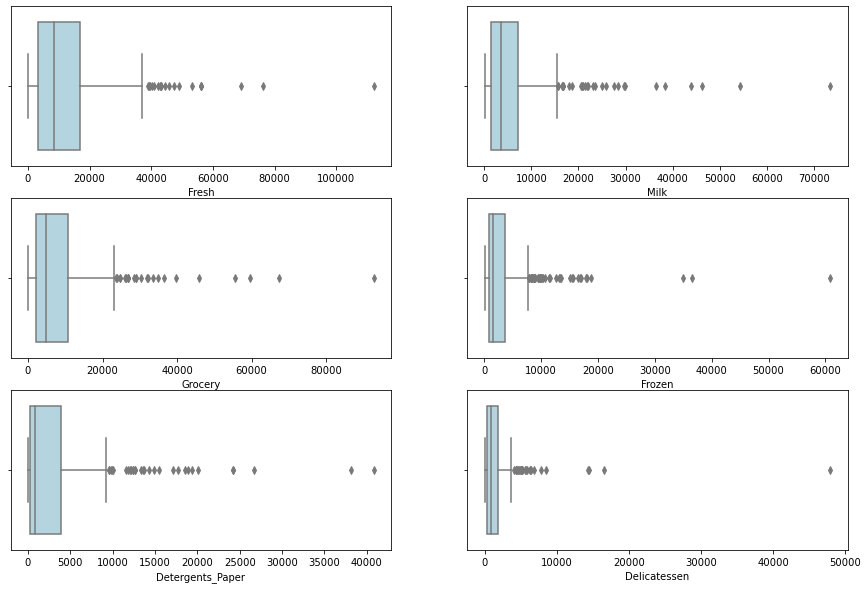

In [55]:
plt.figure(figsize= (15,10))
plt.subplot(3,2,1) #this is important for having multiple box plot 
sns.boxplot(x= df.Fresh, color='lightblue')

plt.subplot(3,2,2)
sns.boxplot(x= df.Milk, color='lightblue')

plt.subplot(3,2,3)
sns.boxplot(x= df.Grocery, color='lightblue')

plt.subplot(3,2,4)
sns.boxplot(x= df.Frozen, color='lightblue')

plt.subplot(3,2,5)
sns.boxplot(x= df.Detergents_Paper, color='lightblue')

plt.subplot(3,2,6)
sns.boxplot(x= df.Delicatessen, color='lightblue')
plt.show()

array([[<AxesSubplot:title={'center':'Fresh'}>,
        <AxesSubplot:title={'center':'Milk'}>],
       [<AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicatessen'}>]], dtype=object)

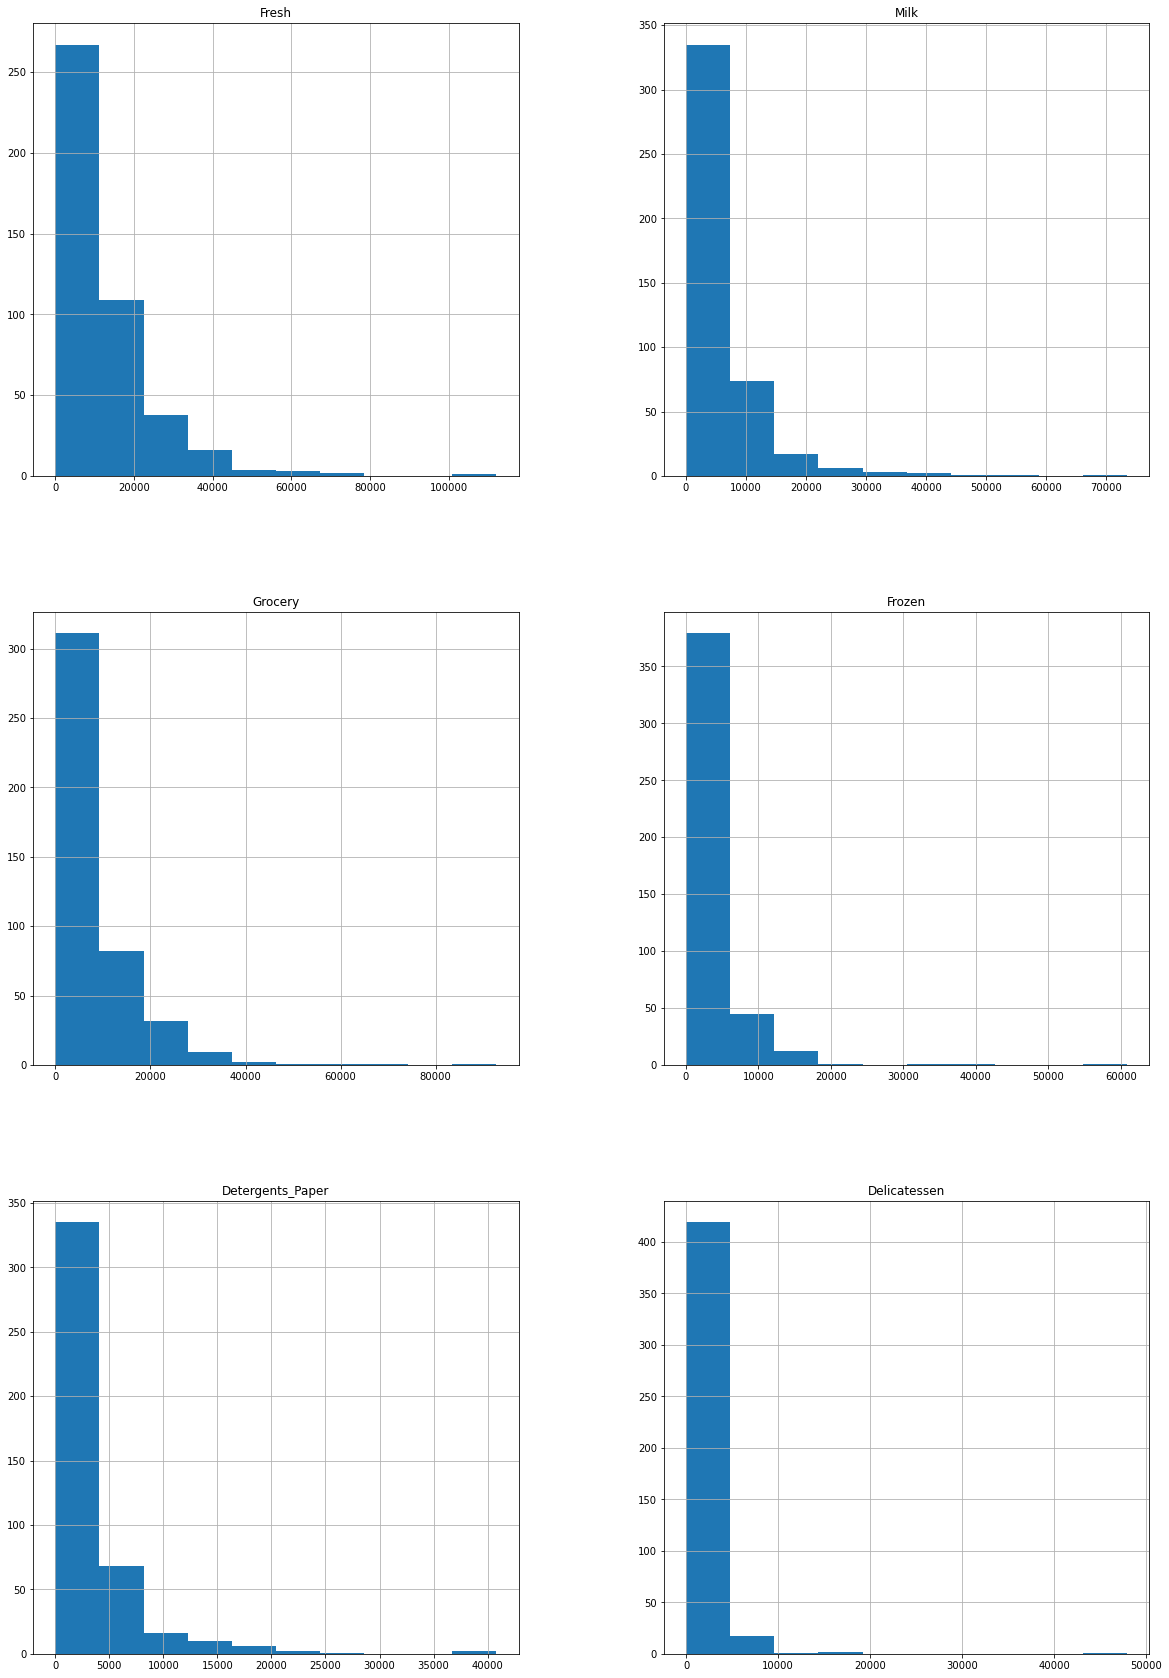

In [56]:
df.iloc[:, 3:9].hist(figsize=(20,30))

## Correlation

In [57]:
corr = df_item.corr().round(2)
corr

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.00,-0.06,-0.16,-0.14,0.05,-0.13,-0.10
Fresh,-0.06,1.00,0.10,-0.01,0.35,-0.10,0.24
Milk,-0.16,0.10,1.00,0.73,0.12,0.66,0.41
Grocery,-0.14,-0.01,0.73,1.00,-0.04,0.92,0.21
Frozen,0.05,0.35,0.12,-0.04,1.00,-0.13,0.39
Detergents_Paper,-0.13,-0.10,0.66,0.92,-0.13,1.00,0.07
Delicatessen,-0.10,0.24,0.41,0.21,0.39,0.07,1.00


<AxesSubplot:>

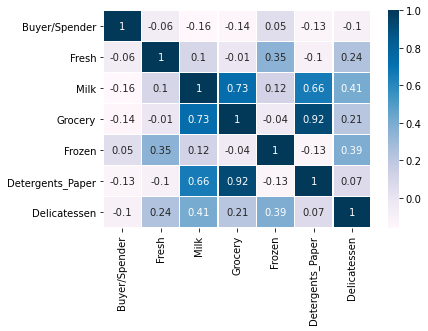

In [58]:
sns.heatmap(corr, annot= True, cmap="PuBu", linewidths=.5)

In [59]:
x.drop(['Buyer/Spender'], axis=1, inplace=True)

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

* The data consists of 6 quantitative variables ('Fresh', 'Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen') and 2 categorical variable (Region and Channels).

* There are in total 440 entries with no null value present in the data

* All the 6 integer type variables consists of many extreme outliers. This is also evidet from the right skewed histogram plot of the 6 variables

* Through calculation of Coefficient of variation, there's greater level of dispertion in the variavle, 'Delicatessen', 'Detergets Paper' and ' Frozen' products.


### Decrible table with CV and Range

In [60]:
x.loc[('CV'), :] = x.loc[('std'), :]/x.loc[('mean'), :]
x.loc[('Range'), :] = x.loc[('max'), :]-x.loc[('min'), :]
x.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.0,440.00,440.00,440.00
mean,12000.30,5796.30,7951.3,3071.90,2881.50,1524.90
std,12647.30,7380.40,9503.2,4854.70,4767.90,2820.10
min,3.00,55.00,3.0,25.00,3.00,3.00
25%,3127.80,1533.00,2153.0,742.20,256.80,408.20
50%,8504.00,3627.00,4755.5,1526.00,816.50,965.50
75%,16933.80,7190.20,10655.8,3554.20,3922.00,1820.20
max,112151.00,73498.00,92780.0,60869.00,40827.00,47943.00
CV,1.05,1.27,1.2,1.58,1.65,1.85
Range,112148.00,73443.00,92777.0,60844.00,40824.00,47940.00


Through calculation of Coefficient of variation, there's greater level of dispertion in the variables, 'Delicatessen', 'Detergets Paper' and ' Frozen' products, while, Fresh and Milk Items shows less variability


### Pivot Table

In [61]:
pd.pivot_table(df,values= ['Fresh', 'Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], index=['Region','Channel'], aggfunc=np.sum, margins= True, margins_name='Total')

Delicatessen  Detergents_Paper    Fresh   Frozen  Grocery  \
Region Channel                                                              
Lisbon Hotel           70632             56081   761233   184512   237542   
       Retail          33695            148055    93600    46514   332495   
Oporto Hotel           30965             13516   326215   160861   123074   
       Retail          23541            159795   138506    29271   310200   
Other  Hotel          320358            165990  2928269   771606   820101   
       Retail         191752            724420  1032308   158886  1675150   
Total                 670943           1267857  5280131  1351650  3498562   

                   Milk  
Region Channel           
Lisbon Hotel     228342  
       Retail    194112  
Oporto Hotel      64519  
       Retail    174625  
Other  Hotel     735753  
       Retail   1153006  
Total           2550357

* Hotels in Lisbon and Oporto spends more on Fresh and Grocery items, while Retails spend more on Grocery and Detergent paper
* in 'Other' places, Hotels spend more on Fresh and Grocery items while Retails spend more on Grocery and Froen items. 

In [62]:
df['Total']= df['Fresh']+ df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicatessen']

In [63]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


<ipython-input-64-d2a9fe2c12da>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Region'])['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum().sort_values(by= 'Region', ascending= False).plot(kind='bar', color=['royalblue', 'darkorange', 'limegreen', 'gold', 'violet', 'red'])


<AxesSubplot:xlabel='Region'>

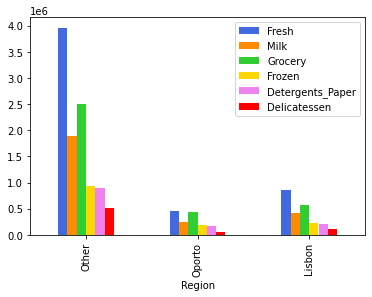

In [64]:
df.groupby(['Region'])['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum().sort_values(by= 'Region', ascending= False).plot(kind='bar', color=['royalblue', 'darkorange', 'limegreen', 'gold', 'violet', 'red'])


In [65]:
df.groupby(['Region'])['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum().sort_values(by= 'Region', ascending= False)

<ipython-input-65-402dc52771b2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Region'])['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum().sort_values(by= 'Region', ascending= False)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Other,3960577,1888759,2495251,930492,890410,512110
Oporto,464721,239144,433274,190132,173311,54506
Lisbon,854833,422454,570037,231026,204136,104327


<AxesSubplot:xlabel='Region'>

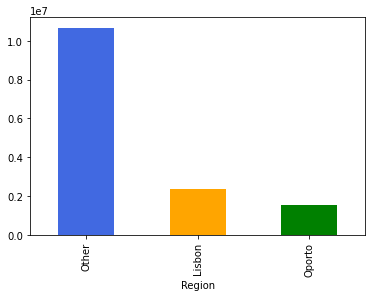

In [66]:
df.groupby(['Region'])['Total'].sum().sort_values(ascending= False).plot(kind='bar', color=['royalblue', 'orange', 'green'])


<AxesSubplot:xlabel='Channel'>

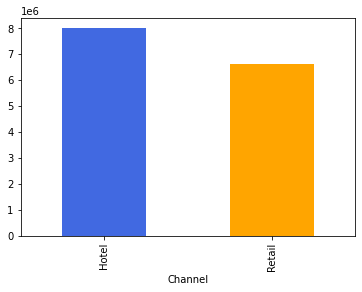

In [67]:
df.groupby(['Channel'])['Total'].sum().sort_values(ascending= False).plot(kind='bar',color=['royalblue', 'orange'])


* Region and channel that spends the most are 'Others' and Hotel respectively, while 'Oporto'  and Retail spends less on the products

### Stats on Items

In [68]:
pivot_table= pd.pivot_table(df,values= ['Fresh', 'Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen', 'Total'], index=['Region'], aggfunc={'Fresh' : [min, max, np.mean, np.std], 
'Milk': [min, max, np.mean, np.std],'Grocery': [min, max, np.mean, np.std], 
'Frozen' : [min, max, np.mean, np.std], 
'Detergents_Paper': [min, max, np.mean, np.std], 
'Delicatessen': [min, max, np.mean, np.std]})

In [69]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pivot_table.T.round(1)

Region                  Lisbon   Oporto     Other
Delicatessen     max    6854.0   5609.0   47943.0
                 mean   1354.9   1159.7    1620.6
                 min       7.0     51.0       3.0
                 std    1345.4   1050.7    3232.6
Detergents_Paper max   19410.0  38102.0   40827.0
                 mean   2651.1   3687.5    2817.8
                 min       5.0     15.0       3.0
                 std    4208.5   6514.7    4593.1
Fresh            max   56083.0  32717.0  112151.0
                 mean  11101.7   9887.7   12533.5
                 min      18.0      3.0       3.0
                 std   11557.4   8387.9   13389.2
Frozen           max   18711.0  60869.0   36534.0
                 mean   3000.3   4045.4    2944.6
                 min      61.0    131.0      25.0
                 std    3092.1   9151.8    4260.1
Grocery          max   39694.0  67298.0   92780.0
                 mean   7403.1   9218.6    7896.4
                 min     489.0   1330.0       3.0
                 std    8496.3  10842.7    9537.3
Milk             max   28326.0  25071.0   73498.0
                 mean   5486.4   5088.2    5977.1
                 min     258.0    333.0      55.0
                 std    5704.9   5826.3    7935.5

* For, Delicatessen, Fresh and Milk products, Others average send is highest followed by Lisbon and oporto
* For, Detergents, Frozen and Grocery, Oporto's average spend is more than Lisbon and Others
* It's quite interesting to note that the min value of amount spent on diffrent food catrgories is drastically low as compared to maximum amount spent


Delicatessen- others> Lisbon> oporto
Detergents- oporto> others> lisbon
Fresh- others> lisbon>oporto
Frozen- oporto> lis> others
Grocery- oporto> other> lisbon
Milk- others> lisbon > oporto

In [70]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pivot_table2= pd.pivot_table(df,values= ['Fresh', 'Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen', 'Total'], index=['Channel'], aggfunc={'Fresh' : [min, max, np.mean, np.std], 
'Milk': [min, max, np.mean, np.std],'Grocery': [min, max, np.mean, np.std], 
'Frozen' : [min, max, np.mean, np.std], 
'Detergents_Paper': [min, max, np.mean, np.std], 
'Delicatessen': [min, max, np.mean, np.std]})

In [71]:
pivot_table2.T.round(1)

Channel                   Hotel   Retail
Delicatessen     max    47943.0  16523.0
                 mean    1416.0   1753.4
                 min        3.0      3.0
                 std     3147.4   1953.8
Detergents_Paper max     6907.0  40827.0
                 mean     790.6   7269.5
                 min        3.0    332.0
                 std     1104.1   6291.1
Fresh            max   112151.0  44466.0
                 mean   13475.6   8904.3
                 min        3.0     18.0
                 std    13831.7   8987.7
Frozen           max    60869.0  11559.0
                 mean    3748.3   1652.6
                 min       25.0     33.0
                 std     5643.9   1812.8
Grocery          max    21042.0  92780.0
                 mean    3962.1  16322.9
                 min        3.0   2743.0
                 std     3545.5  12267.3
Milk             max    43950.0  73498.0
                 mean    3451.7  10716.5
                 min       55.0    928.0
                 std     4352.2   9679.6

* For, Delicatessen, Detergents, Grocery and Milk products, Retail channel average spend is more than Hotels
* For Fresh and Frozen products, Hotel channel average spend is more than Retail's
* It's quite interesting to note that the min value of amount spent on diffrent food categories is drastically low as compared to maximum amount spent